In [ ]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.optim import lr_scheduler
import torch.optim as optim
from torch.autograd import Variable
from trainer_test import fit
import numpy as np
cuda = torch.cuda.is_available()
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

mean, std = 0.28604059698879553, 0.35302424451492237
batch_size = 256

train_dataset = FashionMNIST('../data/FashionMNIST', train=True, download=True,
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((mean,), (std,))
                             ]))
test_dataset = FashionMNIST('../data/FashionMNIST', train=False, download=True,
                            transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((mean,), (std,))
                            ]))

cuda = torch.cuda.is_available()
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

n_classes = 10

In [2]:
# Set up data loaders
from datasets import TripletMNIST

triplet_train_dataset = TripletMNIST(train_dataset) # Returns triplets of images
triplet_test_dataset = TripletMNIST(test_dataset)
batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
triplet_train_loader = torch.utils.data.DataLoader(triplet_train_dataset, batch_size=batch_size, shuffle=True, **kwargs)
triplet_test_loader = torch.utils.data.DataLoader(triplet_test_dataset, batch_size=batch_size, shuffle=False, **kwargs)

# Set up the network and training parameters
from networks import EmbeddingNet, TripletNet
from losses import TripletLoss

margin = 1.
embedding_net = EmbeddingNet()
model = TripletNet(embedding_net)
if cuda:
    model.cuda()
loss_fn = TripletLoss(margin)
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer, 8, gamma=0.1, last_epoch=-1)
n_epochs = 20
log_interval = 100

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [3]:
epochlosses = fit(triplet_train_loader, triplet_test_loader, model, loss_fn, optimizer, scheduler, n_epochs, cuda, log_interval)

C:\ProgramData\Anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Train: [0/60000 (0%)]	Loss: 0.999736
Train: [12800/60000 (21%)]	Loss: 0.298969
Train: [25600/60000 (43%)]	Loss: 0.144498
Train: [38400/60000 (64%)]	Loss: 0.107286
Train: [51200/60000 (85%)]	Loss: 0.078977
Epoch: 1/20. Train set: Average loss: 0.1468
Epoch: 1/20. Validation set: Average loss: 0.0780
Train: [0/60000 (0%)]	Loss: 0.119097
Train: [12800/60000 (21%)]	Loss: 0.054944
Train: [25600/60000 (43%)]	Loss: 0.053934
Train: [38400/60000 (64%)]	Loss: 0.044166
Train: [51200/60000 (85%)]	Loss: 0.044312
Epoch: 2/20. Train set: Average loss: 0.0475
Epoch: 2/20. Validation set: Average loss: 0.0410
Train: [0/60000 (0%)]	Loss: 0.025702
Train: [12800/60000 (21%)]	Loss: 0.039523
Train: [25600/60000 (43%)]	Loss: 0.033110
Train: [38400/60000 (64%)]	Loss: 0.033054
Train: [51200/60000 (85%)]	Loss: 0.035567
Epoch: 3/20. Train set: Average loss: 0.0348
Epoch: 3/20. Validation set: Average loss: 0.0277
Train: [0/60000 (0%)]	Loss: 0.017095
Train: [12800/60000 (21%)]	Loss: 0.025028
Train: [25600/60000 (

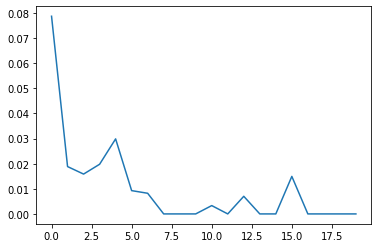

In [4]:
import matplotlib.pyplot as plt 
epochs = []
losses = []
for epoch,loss in epochlosses:
    # print(epoch)
    # print(losses[-1])
    epochs.append(epoch)
    losses.append(loss[-1])
plt.plot(epochs,losses)
plt.show()


In [ ]:
train_embeddings_tl, train_labels_tl = extract_embeddings(train_loader, model)
plot_embeddings(train_embeddings_tl, train_labels_tl)
val_embeddings_tl, val_labels_tl = extract_embeddings(test_loader, model)
plot_embeddings(val_embeddings_tl, val_labels_tl)